In [5]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Group & Topic info

Group members:
  - Florentin Dutruel 5011507
  - Adinda Ramadani 5347734
  - Watetu Mbugua 5721784
  - Aristi Molocha 5864755
  - Nguyen Thi Minh Hoa 5735041

Project type: Application Project<br>
Research Question: What is the correlation between vehicle kilometers and emissions?<br>
Sub question:
  - What are the trends of vehicle kilomiters over the years?
  - What are the trends of emissions over the years?
  - What are the correlations between e/vhkm and years?
  - What are the correlations between emissions and vhkm?

Scope:
  - Time: 1990-2021
  - Place: Netherlands
  - Vehicle types: Passenger cars & Road freight
  - Emission types: CO2, CO, NOx, PM10



<br><br>
Sources:
  - Emissions per transport mode 1990-2021: https://opendata.cbs.nl/statline/portal.html?_la=en&_catalog=CBS&tableId=84735ENG&_theme=1157 
  - Vehicle-kilometres for motor vehicles 1990-2020: https://opendata.cbs.nl/statline/portal.html?_la=en&_catalog=CBS&tableId=80302ENG


Contributions: https://docs.google.com/spreadsheets/d/13XAgn709_jYkHUsW45FdbP5MM8wKJRv-gXowcEMF_7Q/edit#gid=0

# Report

### Data import & filtering

Load the data from the two different datasets and link the data to the meta files.

In [6]:
vk_data = load_vk_data("../data/vehicle-kilometres_data.csv", "../data/vehicle-kilometres_typ_meta.csv")
ems_data = load_ems_data("../data/emissions_data.csv", "../data/emissions_source_meta.csv", "../data/emissions_emission_meta.csv")

Filter and split the data sets into the used topics. 

In [7]:
vk_data_freight = getCategory(vk_data, "Vehicle Type", ["Delivery van", "Lorry (road tractor not included)", "Road tractor"], True)
vk_data_car = getCategory(vk_data, "Vehicle Type", ["Passenger car"], True)

ems_data = getCategory(ems_data, "Emission Type", ["Carbon dioxide (CO2)", "Carbon monoxide (CO)", "PM10 (Particulate matter)", "Nitrogen oxides (NOx)"], False)
ems_data_freight = getCategory(ems_data, "Sources", ["Road traffic, freight vehicles"], False)
ems_data_car = getCategory(ems_data, "Sources", ["Road traffic, passenger cars"], False)

Merge data sets and calculate emissions per kilomiter

In [8]:
freight_data = ems_data_freight.merge(right = vk_data_freight, how="left", on="Year")
car_data = ems_data_car.merge(right = vk_data_car, how="left", on="Year")

vehicle_data = pd.concat([freight_data, car_data])
vehicle_data["e/km"] = vehicle_data["Emission"] / vehicle_data["vhkm"]

display(vehicle_data)

,Sources,Emission Type,Year,Emission,vhkm,e/km
0,"Road traffic, freight vehicles",Carbon dioxide (CO2),1990,7.600000e+09,1.354200e+10,0.561217
1,"Road traffic, freight vehicles",Carbon dioxide (CO2),1991,7.900000e+09,1.436300e+10,0.550024
2,"Road traffic, freight vehicles",Carbon dioxide (CO2),1992,8.400000e+09,1.565000e+10,0.536741
3,"Road traffic, freight vehicles",Carbon dioxide (CO2),1993,8.500000e+09,1.657200e+10,0.512913
4,"Road traffic, freight vehicles",Carbon dioxide (CO2),1994,8.500000e+09,1.664700e+10,0.510603
...,...,...,...,...,...,...
123,"Road traffic, passenger cars",PM10 (Particulate matter),2017,2.300000e+06,1.089361e+11,0.000021
124,"Road traffic, passenger cars",PM10 (Particulate matter),2018,2.300000e+06,1.103559e+11,0.000021
125,"Road traffic, passenger cars",PM10 (Particulate matter),2019,2.200000e+06,1.103728e+11,0.000020
126,"Road traffic, passenger cars",PM10 (Particulate matter),2020,1.800000e+06,9.265420e+10,0.000019


### What are the trends of vehicle kilomiters over the years?

### What are the trends of emissions over the years?

### What are the correlations between e/vhkm and years?

### What are the correlations between emissions and vhkm?

### Conclusion & Discussion

# Graphs and stuff

In [9]:
px.line(vehicle_data, x="Year", y="e/km", color="Emission Type", facet_row="Sources", log_y=True, height=600)

Two line graphs are plotted to illustrate the changes of emission per vehicle-kilometer during the 30-year period from 1990 to 2020. There are 4 types of emission considered,namely CO2, CO, NOx and PM10. These graphs are based on the figures of freight vehicles and passenger cars. 

In terms of CO2, the field of freight vehicles experienced a considerable decrease in the amount of CO2 released per kilometer from 1990 to 2005, then relatively stable amounts were recorded until 2020. This contrasts with the trend of passenger cars during the same period. Within the first 15 years, the emission of CO2 per passenger car kilometer remained nearly unchanged before it had a significant drop from 2005 to 2020. This fall may be a positive effect of the Kyoto Protocol, an international treaty adopted in Kyoto, Japan in 1997 with the aim to reduce the emissions of six greenhouse gases with CO2 as the most important one. Under the Kyoto Protocol, the European Union Emission Trading System started in 2005 and effectively led to a decrease in CO2 emission per kilometer in the Netherlands. Besides, Dutch effort in promoting electric transport since 2010 also contributed to this decrease.

With regard to the remaining three types of emission which are CO, NOx, PM10, a gradual slight decrease in the amount of emission of each type per kilometer was recorded for both freight vehicles and passenger cars. Remarkably, while the emisison of NOx is higher than that of CO for freight vehicles, the data of CO surpassed the data of NOx for passenger cars over 30 years. 

In [10]:
px.line(vehicle_data, x="Year", y="Emission", color="Emission Type", facet_row="Sources", log_y=True, height=600)

In [11]:
px.line(vehicle_data, x="Year", y="vhkm", color="Sources")

In [12]:
px.scatter(vehicle_data, x="vhkm", y="Emission", text="Year", color="Emission Type", facet_row="Sources", height=1000)

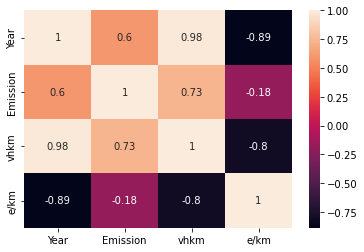

In [13]:
corr_heatmap("car", "CO2", end_year=2018)

# Python code/functions

#### Load Data functions

In [14]:
def load_vk_data(data_path, meta_path):
    vk_data = pd.read_csv(data_path, sep=";", index_col="ID")
    vk_meta = pd.read_csv(meta_path, sep=";", skiprows=1, index_col="Key")

    vehicle_type = vk_data["TypesOfVehicle"].array.copy()
    for i in range(len(vehicle_type)):
        vehicle_type[i] = vk_meta.loc[vehicle_type[i], "Title"]

    vk_data["TypesOfVehicle"] = vehicle_type
    vk_data["Periods"] = vk_data["Periods"].apply(lambda s: int(s[0:4]))
    vk_data.drop(columns=vk_data.columns.to_list()[3:], inplace=True)
    vk_data.rename(columns={"TypesOfVehicle":"Vehicle Type", "Periods":"Year", "TotalKilometresInTheNetherlands_1":"vhkm"}, inplace=True)
    vk_data["vhkm"] *= 1000000 # stored in milion km
    return vk_data

def load_ems_data(data_path, source_meta_path, emissions_meta_path):
    ems_data = pd.read_csv(data_path, sep=";", index_col="ID")
    ems_source_meta = pd.read_csv(source_meta_path, sep=";", skiprows=1, index_col="Key")
    ems_emission_meta = pd.read_csv(emissions_meta_path, sep=";", skiprows=1, index_col="Key")

    sources = ems_data["Sources"].array.copy()
    emissions = ems_data["Emissions"].array.copy()
    for i in range(len(sources)):
        sources[i] = ems_source_meta.loc[sources[i], "Title"]
        emissions[i] = ems_emission_meta.loc[emissions[i], "Title"]

    ems_data["Sources"] = sources
    ems_data["Emissions"] = emissions
    ems_data["Periods"] = ems_data["Periods"].apply(lambda s: int(s[0:4]))
    ems_data.rename(columns={"Emissions":"Emission Type", "Periods":"Year", "EmissionsDutchTerritory_1":"Emission"}, inplace=True)
    ems_data["Emission"] *= 1000000 # stored in milion kg
    return ems_data

# print(vk_data["Vehicle Type"].unique())
# print()
# print(ems_data["Sources"].unique())
# print()
# print(ems_data["Emission Type"].unique())

#### Filter Data functions

In [15]:
def getCategory(df, col_name, cat, sum_cat):
    df = df.copy()
    bools = np.zeros(len(df[col_name]), dtype=bool)
    
    for i in range(len(cat)):
        bools = np.logical_or(bools, df[col_name] == cat[i])
        
    if sum_cat:
        df = df[bools].groupby("Year").sum()
        df["Year"] = df.index.array
        df.index.names = ["Not_Year"]
        return df
    else:
        return df[bools]

#### Heatmaps

In [16]:
def corr_heatmap(vehicle, emission, start_year=1990, end_year=2021):
    vehicle_data_CO2 = vehicle_data[vehicle_data["Emission Type"] == "Carbon dioxide (CO2)"]
    vehicle_data_CO = vehicle_data[vehicle_data["Emission Type"] == "Carbon monoxide (CO)"]
    vehicle_data_NOx = vehicle_data[vehicle_data["Emission Type"] == "Nitrogen oxides (NOx)"]
    vehicle_data_PM10 = vehicle_data[vehicle_data["Emission Type"] == "PM10 (Particulate matter)"]

    vehicle_data_CO2 = vehicle_data_CO2[vehicle_data_CO2["Year"] >= start_year]
    vehicle_data_CO2 = vehicle_data_CO2[vehicle_data_CO2["Year"] <= end_year]
    vehicle_data_CO = vehicle_data_CO[vehicle_data_CO["Year"] >= start_year]
    vehicle_data_CO = vehicle_data_CO[vehicle_data_CO["Year"] <= end_year]
    vehicle_data_NOx = vehicle_data_NOx[vehicle_data_NOx["Year"] >= start_year]
    vehicle_data_NOx = vehicle_data_NOx[vehicle_data_NOx["Year"] <= end_year]
    vehicle_data_PM10 = vehicle_data_PM10[vehicle_data_PM10["Year"] >= start_year]
    vehicle_data_PM10 = vehicle_data_PM10[vehicle_data_PM10["Year"] <= end_year]

    car_data_CO2 = vehicle_data_CO2[vehicle_data_CO2["Sources"] == "Road traffic, passenger cars"]
    car_data_CO = vehicle_data_CO[vehicle_data_CO["Sources"] == "Road traffic, passenger cars"]
    car_data_NOx = vehicle_data_NOx[vehicle_data_NOx["Sources"] == "Road traffic, passenger cars"]
    car_data_PM10 = vehicle_data_PM10[vehicle_data_PM10["Sources"] == "Road traffic, passenger cars"]
    freight_data_CO2 = vehicle_data_CO2[vehicle_data_CO2["Sources"] == "Road traffic, freight vehicles"]
    freight_data_CO = vehicle_data_CO[vehicle_data_CO["Sources"] == "Road traffic, freight vehicles"]
    freight_data_NOx = vehicle_data_NOx[vehicle_data_NOx["Sources"] == "Road traffic, freight vehicles"]
    freight_data_PM10 = vehicle_data_PM10[vehicle_data_PM10["Sources"] == "Road traffic, freight vehicles"]
    
    sns.heatmap(eval(f"{vehicle}_data_{emission}").corr(method="pearson"), annot=True)

#### Animation

In this part, animations are provided to vividly illustrate the changes of emission per vehicle-kilometer during the 1990-2020 period. Because the 4 types of emission have different ranges, we separate the animations for CO2, CO together with NOx, and PM10. 

##### Emission of CO2 per vehicle-kilometer during 1990-2020

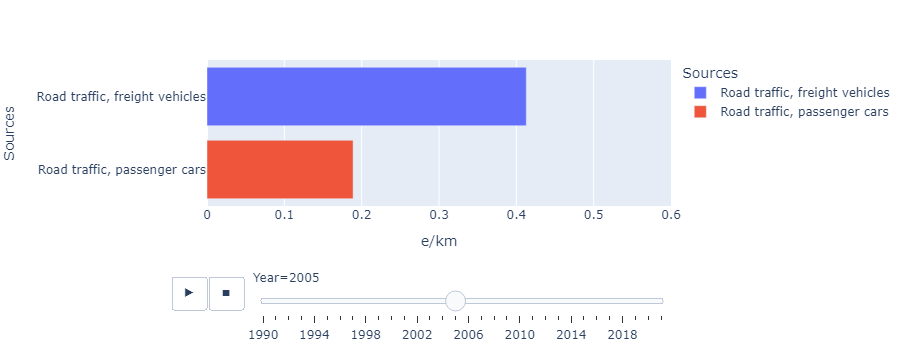

In [51]:
vehicle_data_ani1 = getCategory(vehicle_data, "Emission Type", ["Carbon dioxide (CO2)"], False)
fig = px.bar(vehicle_data_ani1, x="e/km", y="Sources", orientation='h', animation_frame="Year", animation_group="Sources", 
             color="Sources", range_x=[0,0.6])
fig.update_traces(showlegend=False)
fig.show()

In general, the emission of CO2 recorded a downward trend for both freight vehicles and passenger cars. The interesting point here is that from 1990 to 2005, only the emission of CO2 per freight vehicle kilometer changed while the data for passenger cars remained stable. From 2005 to 2020, the former fluctuated around the figure of above 0.4, whereas the latter decreased gradually. 

##### Emission of CO & NOx per vehicle-kilometer during 1990-2020

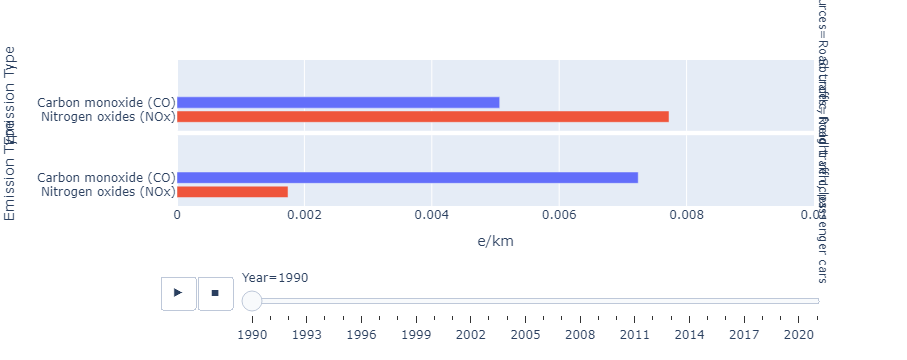

In [52]:
vehicle_data_ani2 = getCategory(vehicle_data, "Emission Type", ["Carbon monoxide (CO)", "Nitrogen oxides (NOx)"], False)
fig = px.bar(vehicle_data_ani2, x="e/km", y="Emission Type", orientation='h', animation_frame="Year", animation_group="Emission Type", 
             color="Emission Type", facet_row="Sources", range_x=[0,0.01], height=700)
fig.update_traces(showlegend=False)
fig.show()

In general, the emission of CO and NOx recorded a significant downward trend for both freight vehicles and passenger cars. What should be noticed here about CO is that this emission per freight vehicle kilometer reached a plateau from 2005 to 2010 while the data for passenger cars stopped decreasing during 2002 and 2005. When it comes to NOx, the period from 2006 to 2008 saw a slight increase of the mission of NOx per freight vehicle kilometer, whereas this emission of passenger cars continues to decrease over the whole surveyed period.

##### Emission of PM10 per vehicle-kilometer during 1990-2020

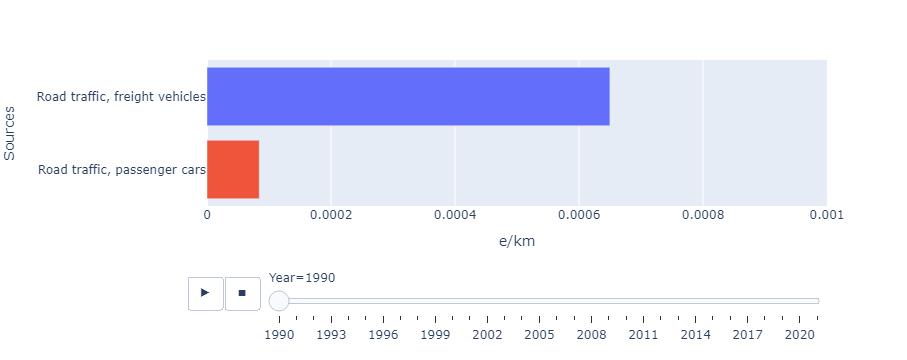

In [53]:
vehicle_data_ani3 = getCategory(vehicle_data, "Emission Type", ["PM10 (Particulate matter)"], False)
fig = px.bar(vehicle_data_ani3, x="e/km", y="Sources", orientation='h', animation_frame="Year", animation_group="Sources", 
             color="Sources", range_x=[0,0.001])
fig.update_traces(showlegend=False)
fig.show()

In general, the emission of PM10 recorded a significant downward trend for both freight vehicles and passenger cars. However, the data for freight vehicles was always higher than that for passenger cars during 30 years.